<a href="https://colab.research.google.com/github/Hyewon0920/tensorflow/blob/main/mnist_tensorflow_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.12.0


In [3]:
import matplotlib.pyplot as plt


In [27]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0 #MinMaxScale을 적용한것

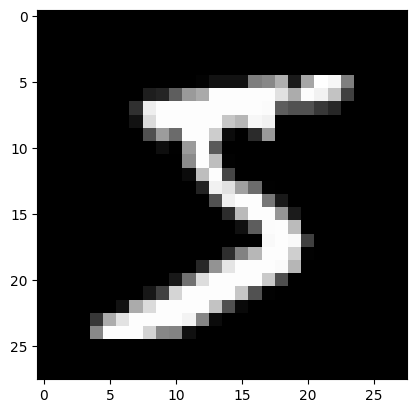

In [15]:
# 이미지 하나 확인하기
img = x_train[0]
plt.imshow(img, cmap = "gray")

tf.Tensor(
[[[[ 0.0000000e+00  0.0000000e+00  0.0000000e+00  0.0000000e+00
     0.0000000e+00]
   [ 0.0000000e+00  0.0000000e+00  0.0000000e+00  0.0000000e+00
     0.0000000e+00]
   [ 0.0000000e+00  0.0000000e+00  0.0000000e+00  0.0000000e+00
     0.0000000e+00]
   [ 0.0000000e+00  0.0000000e+00  0.0000000e+00  0.0000000e+00
     0.0000000e+00]
   [ 0.0000000e+00  0.0000000e+00  0.0000000e+00  0.0000000e+00
     0.0000000e+00]
   [ 0.0000000e+00  0.0000000e+00  0.0000000e+00  0.0000000e+00
     0.0000000e+00]
   [ 0.0000000e+00  0.0000000e+00  0.0000000e+00  0.0000000e+00
     0.0000000e+00]
   [ 0.0000000e+00  0.0000000e+00  0.0000000e+00  0.0000000e+00
     0.0000000e+00]
   [ 0.0000000e+00  0.0000000e+00  0.0000000e+00  0.0000000e+00
     0.0000000e+00]
   [ 0.0000000e+00  0.0000000e+00  0.0000000e+00  0.0000000e+00
     0.0000000e+00]
   [ 0.0000000e+00  0.0000000e+00  0.0000000e+00  0.0000000e+00
     0.0000000e+00]
   [ 0.0000000e+00  0.0000000e+00  0.0000000e+00  0.0000000e+00
 

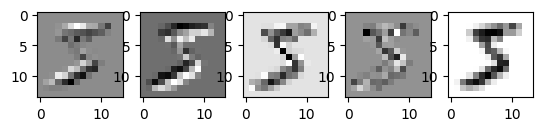

In [20]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

img = img.reshape(-1, 28, 28, 1)
W1 = tf.Variable(tf.random.normal([3, 3, 1, 5], stddev=0.01))
conv2d = tf.nn.conv2d(img, W1, strides=[1, 2, 2, 1], padding="SAME")
print(conv2d)

conv2d_img = conv2d.numpy()
conv2d_img = np.swapaxes(conv2d_img, 0, 3)
# 5개의 다른 이미지를 뽑아냄. 왜 달라지는가 -> 위의 W가중치를 random하게 설정했으므로

for i, one_img in enumerate(conv2d_img):
    plt.subplot(1, 5, i + 1), plt.imshow(one_img.reshape(14, 14), cmap='gray')
plt.show()


tf.Tensor(
[[[[ 0.0000000e+00  0.0000000e+00  0.0000000e+00  0.0000000e+00
     0.0000000e+00]
   [ 0.0000000e+00  0.0000000e+00  0.0000000e+00  0.0000000e+00
     0.0000000e+00]
   [ 0.0000000e+00  0.0000000e+00  0.0000000e+00  0.0000000e+00
     0.0000000e+00]
   [ 0.0000000e+00  0.0000000e+00  0.0000000e+00  0.0000000e+00
     0.0000000e+00]
   [ 0.0000000e+00  0.0000000e+00  0.0000000e+00  0.0000000e+00
     0.0000000e+00]
   [ 0.0000000e+00  0.0000000e+00  0.0000000e+00  0.0000000e+00
     0.0000000e+00]
   [ 0.0000000e+00  0.0000000e+00  0.0000000e+00  0.0000000e+00
     0.0000000e+00]]

  [[ 0.0000000e+00  0.0000000e+00  0.0000000e+00  0.0000000e+00
     0.0000000e+00]
   [ 5.1021534e-01  0.0000000e+00  0.0000000e+00  0.0000000e+00
     0.0000000e+00]
   [ 3.9019585e+00 -1.1413910e+00  4.0339708e-01  4.3587741e-01
    -6.6304934e-01]
   [ 5.7709990e+00  2.8598797e+00  5.0988525e-01  1.0569694e+00
    -3.4121444e+00]
   [ 1.5987192e+00  5.3043809e+00 -1.6327585e+00  2.9684038e+00

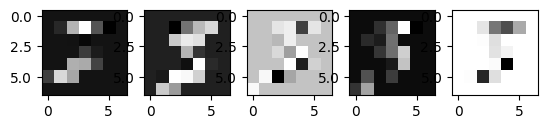

In [23]:
# maxpooling

pool = tf.nn.max_pool(conv2d, ksize = [1,2,2,1], strides = [1,2,2,1], padding = "SAME")
print(pool)
pool_img = pool.numpy()
pool_img = np.swapaxes(pool_img, 0, 3)
# 5개의 다른 이미지를 뽑아냄. 왜 달라지는가 -> 위의 W가중치를 random하게 설정했으므로
# subsampling이라고 함
for i, one_img in enumerate(pool_img):
    plt.subplot(1, 5, i + 1), plt.imshow(one_img.reshape(7, 7), cmap='gray')

In [28]:
# mnist dataset reshape하기
x_train = x_train.reshape((60000, 28 ,28, 1))
x_test = x_test.reshape((10000, 28 ,28, 1))

첫 번째 Conv2D 레이어:

- 필터 개수: 32
- 커널 크기: (3, 3)
- 스트라이드: (1, 1)
- 패딩: 'same'
- 활성화 함수: ReLU
- 입력 형상: (28, 28, 1)

첫 번째 MaxPooling2D 레이어:

- 풀링 크기: (2, 2)
- 스트라이드: 기본값으로 설정된 (2, 2) 사용
- 입력 형상: 이전 레이어의 출력 형상에서 자동으로 계산됨

두 번째 Conv2D 레이어:

- 필터 개수: 64
- 커널 크기: (2, 2)
- 스트라이드: 기본값으로 설정된 (1, 1) 사용
- 패딩: 'same'
- 활성화 함수: ReLU
- 입력 형상: 이전 레이어의 출력 형상에서 자동으로 계산됨
두 번째 MaxPooling2D 레이어:

두번째 max pooling

- 풀링 크기: (2, 2)
- 스트라이드: 기본값으로 설정된 (2, 2) 사용
- 입력 형상: 이전 레이어의 출력 형상에서 자동으로 계산됨

Dropout 레이어:

- 드롭아웃 비율: 0.25
- 학습할 땐 0.5나 0.7, test할 땐 1로 해줄 것!
- 입력 형상: 이전 레이어의 출력 형상과 동일

Flatten 레이어:

- 입력 형상: 이전 레이어의 출력 형상을 1차원으로 펼침

첫 번째 Dense 레이어:

- Dense는 FC layer, 즉, 완전연결계산을 수행함
- 뉴런 개수: 1000
- 활성화 함수: ReLU
- 입력 형상: 이전 레이어의 출력 형상과 동일
- 1000개는 그냥 임의의 숫자 클수록 더 많은 특징을 계산할 수 있음. 1000개 정도면 충분히 많은 특징 계산 가능

두 번째 Dense 레이어 (출력 레이어):

- 뉴런 개수: 10 (클래스 개수)
- 활성화 함수: Softmax
- 입력 형상: 이전 레이어의 출력 형상과 동일

In [30]:
from tensorflow.keras import layers, models

#32개의 필터, input은 28x28, 흑백사진임.
model = models.Sequential([
    # 들어갈 input size = (?, 28,28,1)
    layers.Conv2D(32, kernel_size=(3, 3), strides=(1, 1),
                  padding='same', activation='relu', input_shape=(28, 28, 1)),
     # 들어갈 input size = (?, 28,28,32)
    layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
    # 아래부터 2번째 conv layer
    layers.Conv2D(64, kernel_size=(2, 2), activation='relu', padding='same'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Dropout(0.25),
    layers.Flatten(), #fclayer에 넣기 위해 펴주기
    layers.Dense(1000, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 64)        8256      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 7, 7, 64)          0         
                                                                 
 flatten_1 (Flatten)         (None, 3136)             

In [ ]:
# fit, 모델 훈련
import time

model.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

start_time = time.time()

hist = model.fit(x_train, y_train, epochs=5, verbose = 1, validation_data=(x_test, y_test))

print(f'Fit Time :{time.time() - start_time}')

Epoch 1/5
1875/1875 [==============================] - 161s 85ms/step - loss: 0.1196 - accuracy: 0.9624 - val_loss: 0.0370 - val_accuracy: 0.9881
Epoch 2/5
 481/1875 [======>.......................] - ETA: 1:44 - loss: 0.0473 - accuracy: 0.9844